<a href="https://colab.research.google.com/github/Rohidhs/Fertilizer-Recommendation-System/blob/main/Fertilizer_Recommendation_System_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

In [70]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("data_core.csv")

Saving data_core.csv to data_core (1).csv


In [71]:
df.head()

Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0     Sandy      Maize        37          0   
1         29.0      52.0      45.0     Loamy  Sugarcane        12          0   
2         34.0      65.0      62.0     Black     Cotton         7          9   
3         32.0      62.0      34.0       Red    Tobacco        22          0   
4         28.0      54.0      46.0    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea

In [72]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [73]:
df.duplicated().sum()

np.int64(0)

In [74]:
df.shape

(8000, 9)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [76]:
df.describe()

Temparature     Humidity     Moisture     Nitrogen    Potassium  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     30.338895    59.210731    43.580862    18.429125     3.916375   
std       4.478262     8.177366    12.596156    11.852406     5.494807   
min      20.000000    40.020000    20.000000     0.000000     0.000000   
25%      27.050000    53.277500    33.967500     9.000000     0.000000   
50%      30.240000    59.110000    42.250000    14.000000     1.000000   
75%      33.460000    65.082500    52.950000    26.000000     5.000000   
max      40.000000    80.000000    70.000000    46.000000    23.000000   

       Phosphorous  
count  8000.000000  
mean     18.512500  
std      13.244113  
min       0.000000  
25%       8.000000  
50%      18.000000  
75%      30.000000  
max      46.000000

In [77]:
# Convert categorical columns to categorical type
categorical_columns = ["Soil Type", "Crop Type", "Fertilizer Name"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

Text(0.5, 1.0, 'Count Plot - Soil Type')

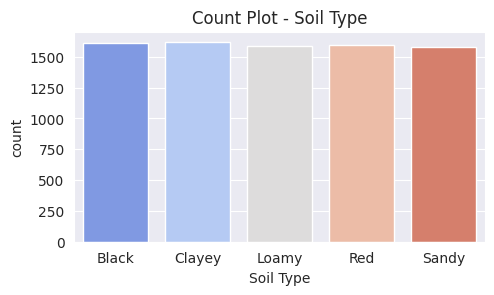

In [78]:
# Set plot style
sns.set_style("darkgrid")

# Initialize figure size
plt.figure(figsize=(18, 6))

# --- 🔹 1. Count Plot ---
plt.subplot(2, 3, 1)
sns.countplot(x="Soil Type", data=df, palette="coolwarm")
plt.title("Count Plot - Soil Type")

Text(0.5, 1.0, 'Histogram - Temperature')

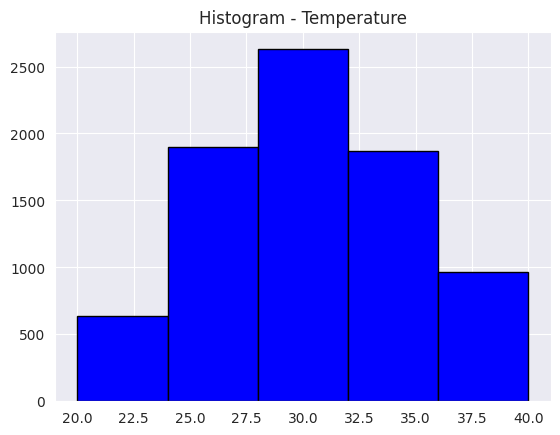

In [79]:
# --- 🔹 2. Histogram ---
plt.subplot(1, 1, 1)
plt.hist(df["Temparature"], bins=5, color="blue", edgecolor="black")
plt.title("Histogram - Temperature")


Text(0.5, 1.0, 'Bar Plot - Moisture by Crop Type')

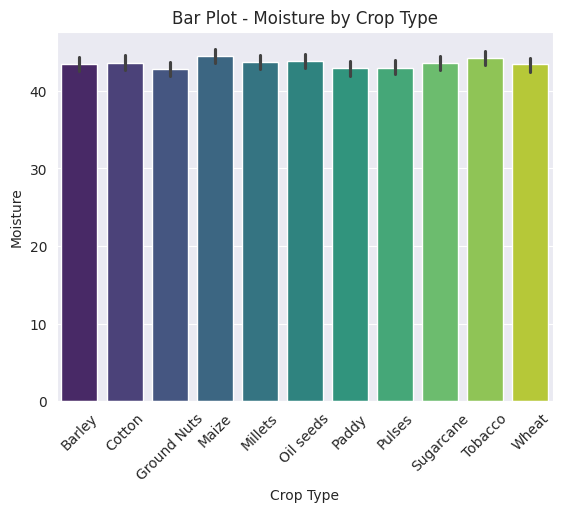

In [80]:

plt.subplot(1, 1, 1)
sns.barplot(x="Crop Type", y="Moisture", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Bar Plot - Moisture by Crop Type")

Text(0.5, 1.0, 'Box Plot - Nitrogen by Soil Type')

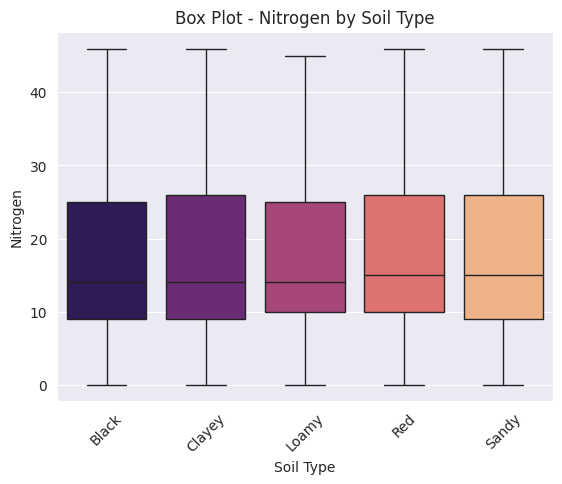

In [81]:
plt.subplot(1, 1, 1)
sns.boxplot(x="Soil Type", y="Nitrogen", data=df, palette="magma")
plt.xticks(rotation=45)
plt.title("Box Plot - Nitrogen by Soil Type")

<Axes: >

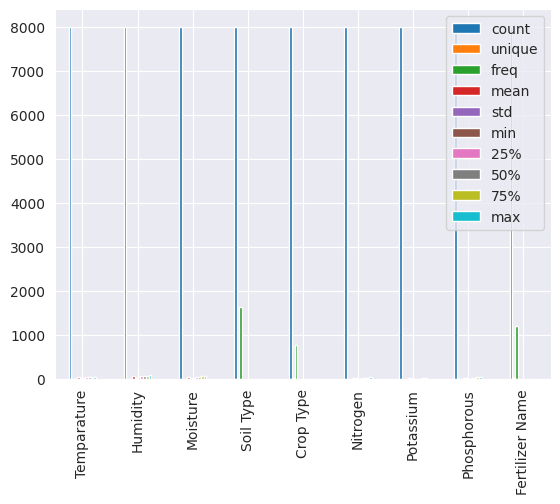

In [82]:
df.describe(include='all').T.plot(kind='bar')

In [83]:
numerical_col = df.select_dtypes(include=['number']).columns
print(numerical_col)

Index(['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

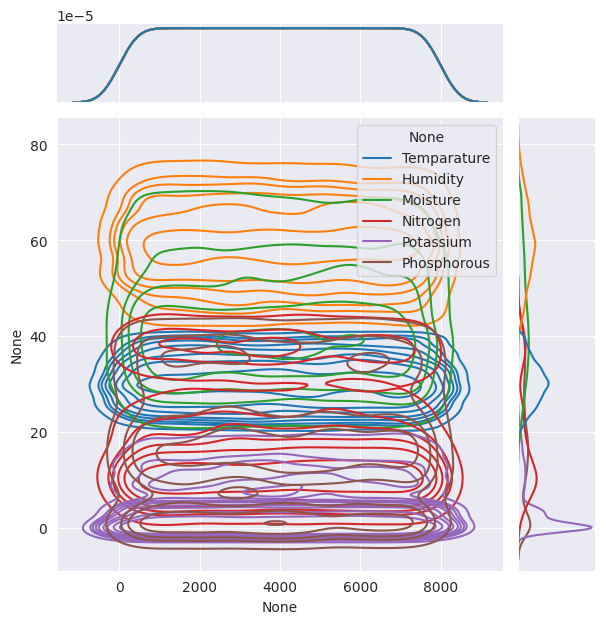

In [84]:
plt.figure(figsize=(10,6))
sns.jointplot(data=df[numerical_col],kind='kde')
plt.show()

Text(0.5, 1.0, 'Scatter Plot - Temperature vs Humidity')

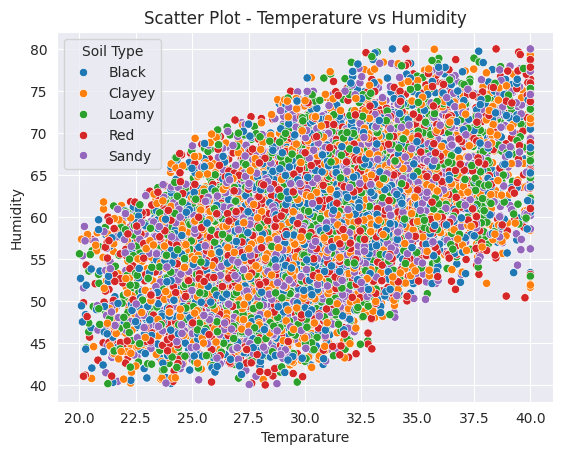

In [85]:
plt.subplot(1, 1, 1)
sns.scatterplot(x="Temparature", y="Humidity", hue="Soil Type", data=df)
plt.title("Scatter Plot - Temperature vs Humidity")


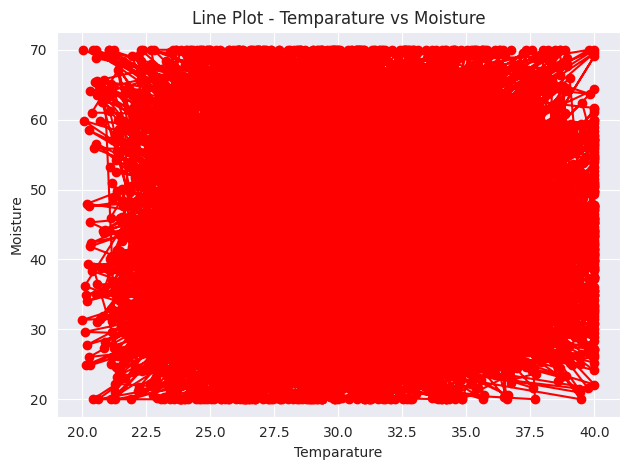

In [86]:
plt.subplot(1, 1, 1)
plt.plot(df["Temparature"], df["Moisture"], marker="o", linestyle="-", color="red")
plt.xlabel("Temparature")
plt.ylabel("Moisture")
plt.title("Line Plot - Temparature vs Moisture")

plt.tight_layout()
plt.show()

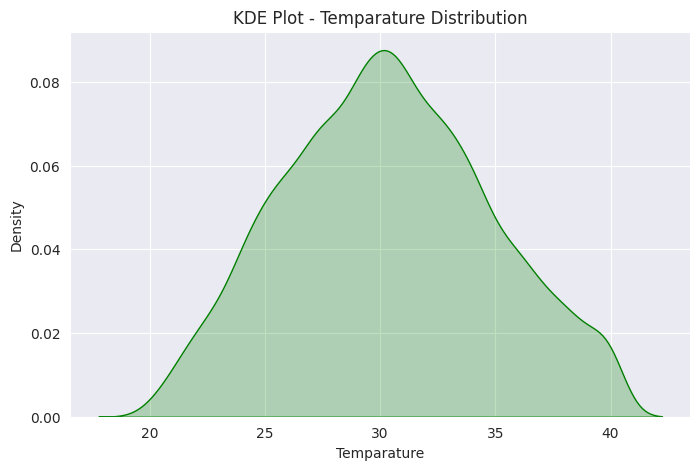

In [87]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df["Temparature"], fill=True, color="green")
plt.title("KDE Plot - Temparature Distribution")
plt.show()

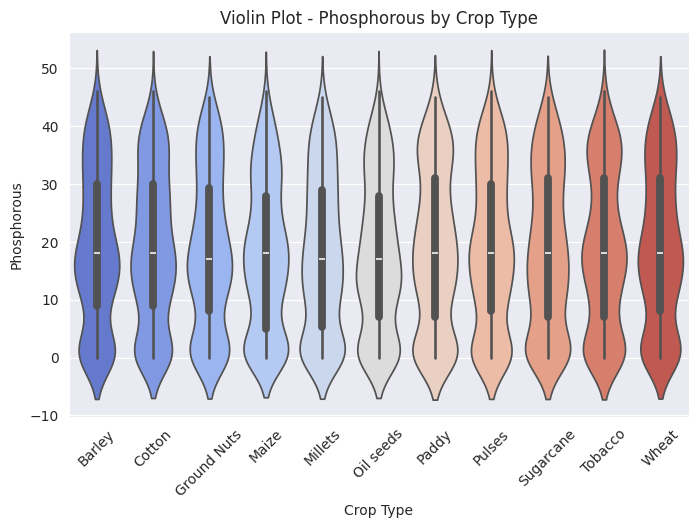

In [88]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Crop Type", y="Phosphorous", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Violin Plot - Phosphorous by Crop Type")
plt.show()

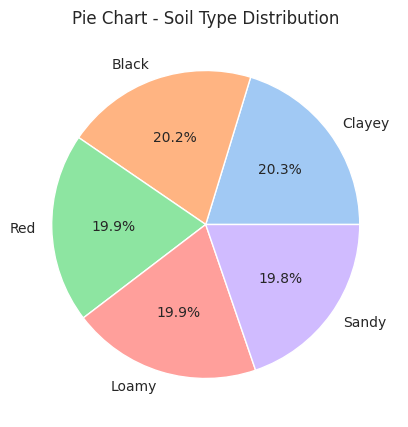

In [89]:
plt.figure(figsize=(8, 5))
df["Soil Type"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Pie Chart - Soil Type Distribution")
plt.ylabel("")
plt.show()

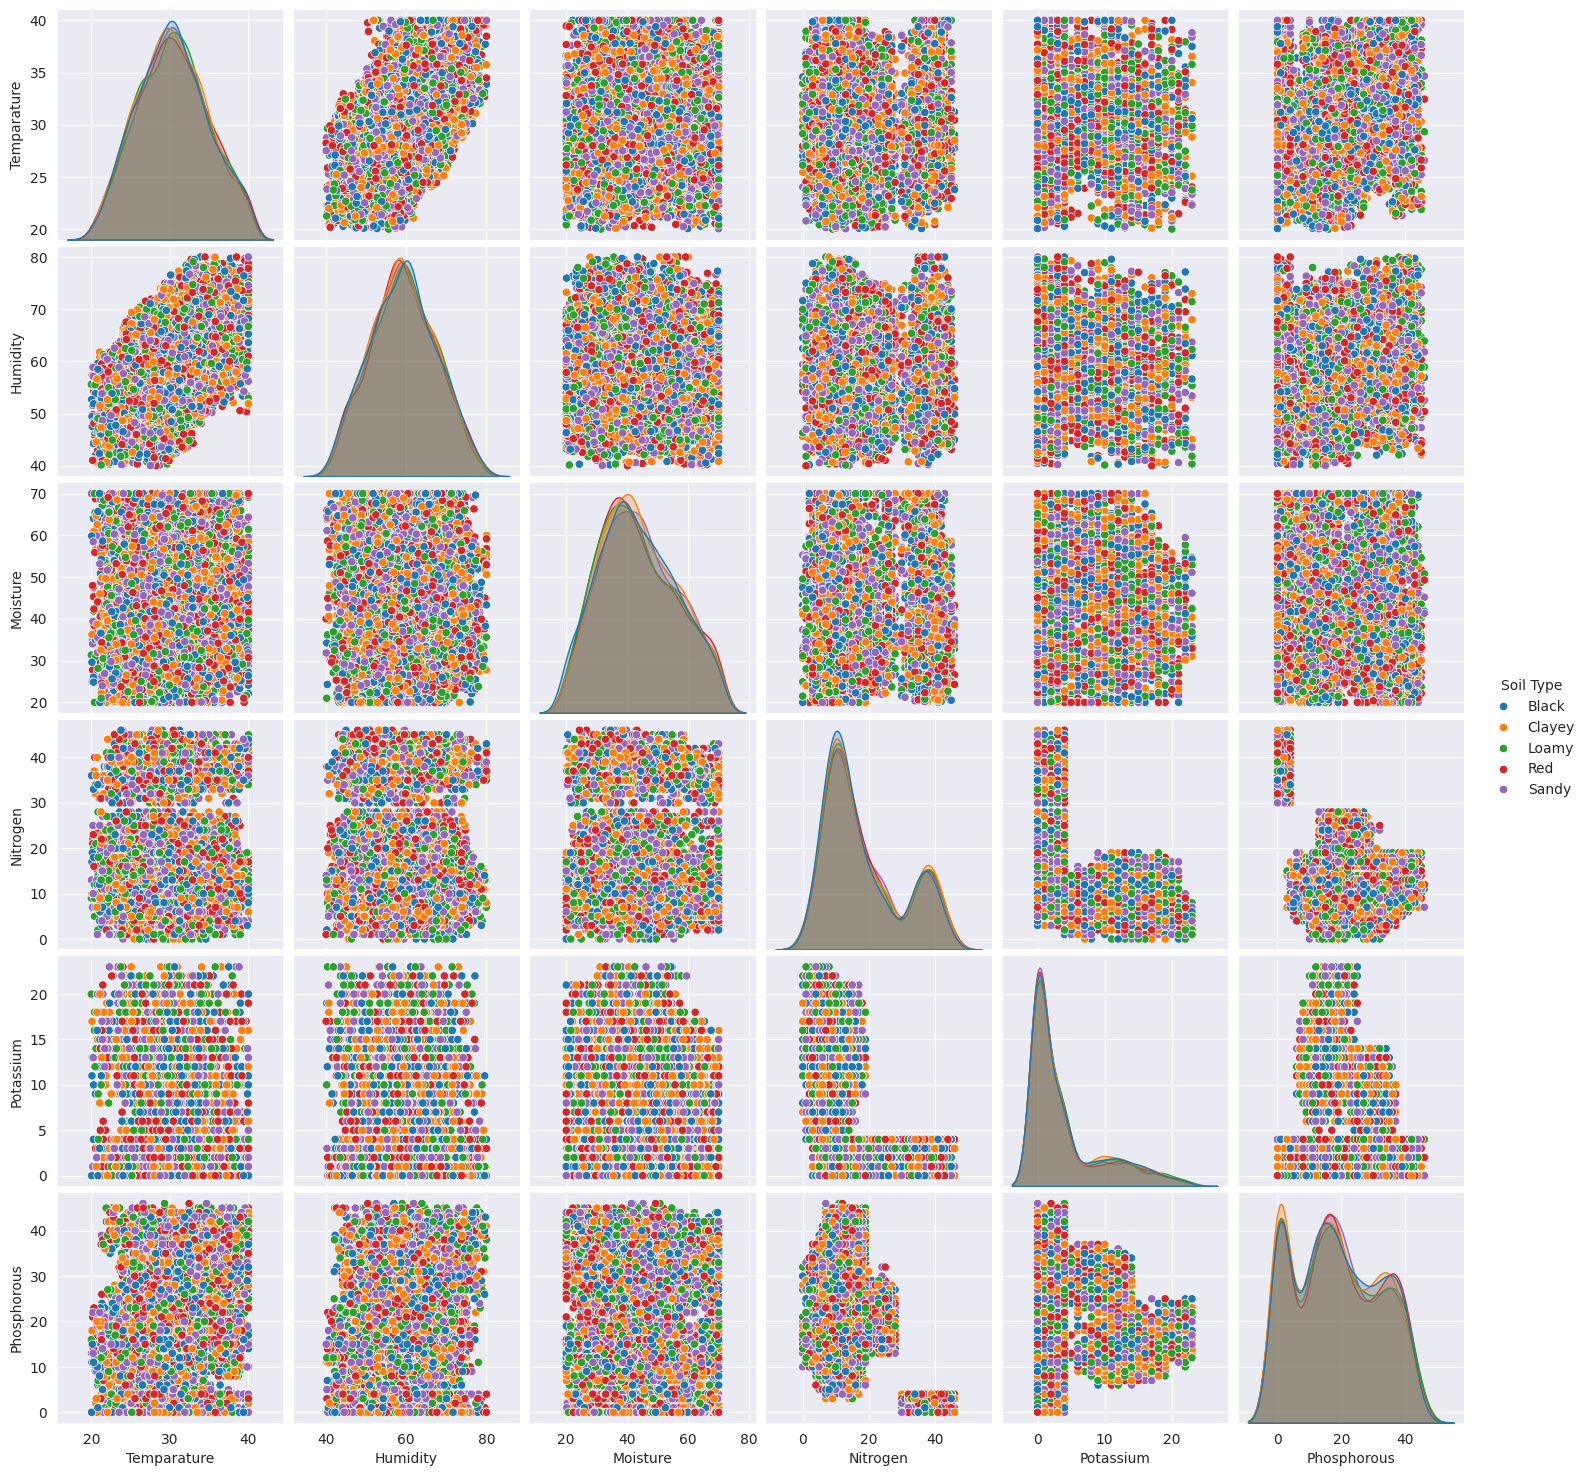

In [90]:
sns.pairplot(df, hue="Soil Type", diag_kind="kde")
plt.show()

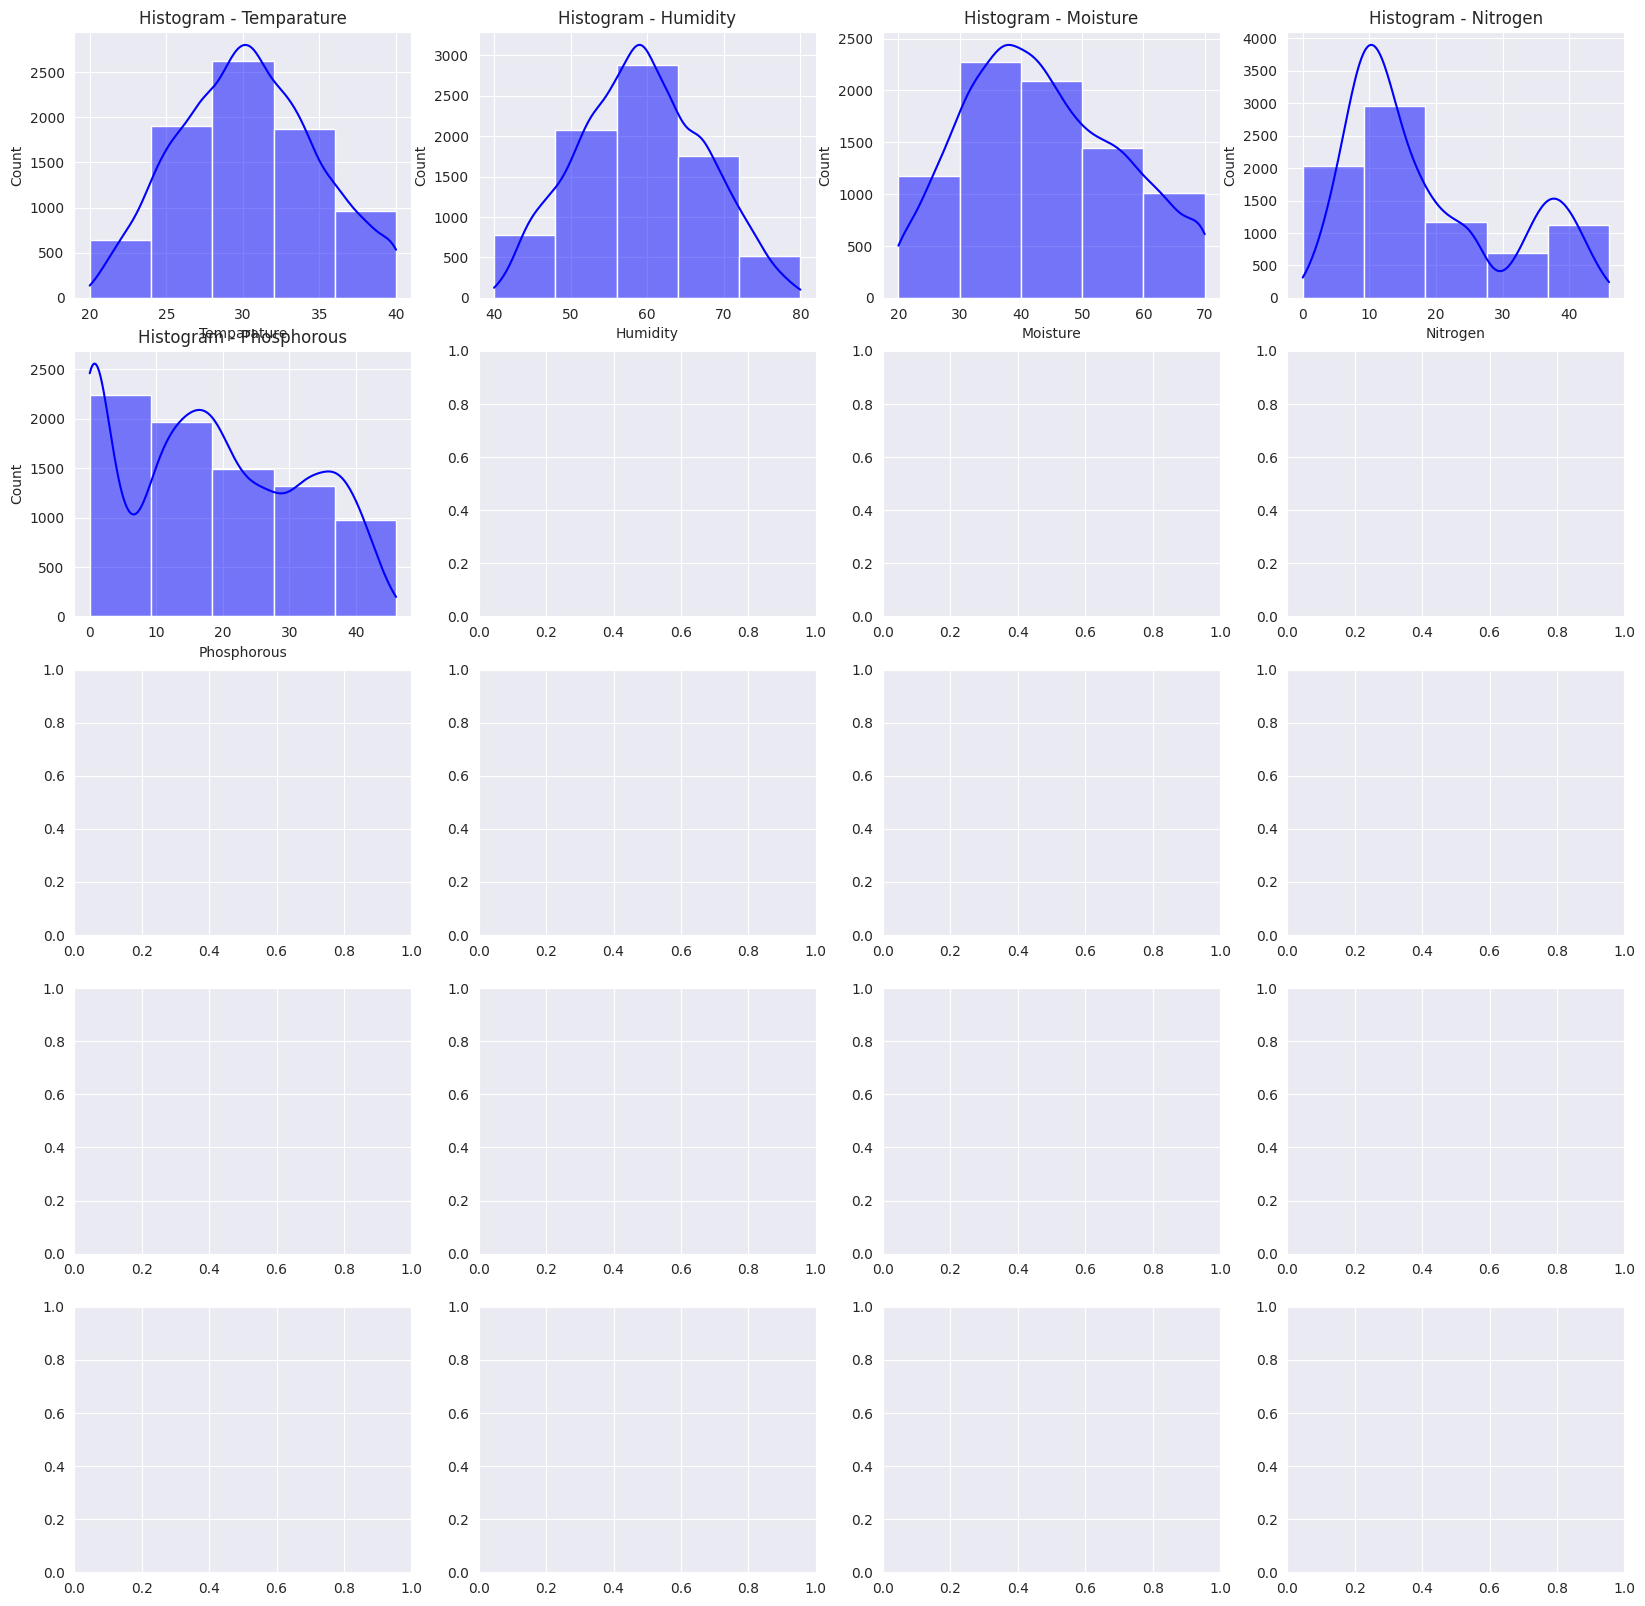

In [91]:
# --- Additional Plots ---
fig, axes = plt.subplots(5, 4, figsize=(20, 20))

# --- 🔹 12-16. Histograms ---
columns_to_plot = ["Temparature", "Humidity", "Moisture", "Nitrogen", "Phosphorous"]
for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], bins=5, kde=True, color="blue", ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f"Histogram - {col}")


In [92]:
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=df[col], color="orange", ax=axes[(i + 5) // 4, (i + 5) % 4])
    axes[(i + 5) // 4, (i + 5) % 4].set_title(f"Box Plot - {col}")

sns.scatterplot(x="Temparature", y="Nitrogen", data=df, ax=axes[2, 0])
sns.scatterplot(x="Humidity", y="Moisture", data=df, ax=axes[2, 1])
sns.scatterplot(x="Moisture", y="Phosphorous", data=df, ax=axes[2, 2])
sns.scatterplot(x="Temparature", y="Potassium", data=df, ax=axes[2, 3])
sns.scatterplot(x="Humidity", y="Nitrogen", data=df, ax=axes[3, 0])

sns.kdeplot(df["Temparature"], fill=True, ax=axes[3, 1])
sns.kdeplot(df["Moisture"], fill=True, ax=axes[3, 2])
sns.violinplot(y=df["Humidity"], ax=axes[3, 3])
sns.violinplot(y=df["Phosphorous"], ax=axes[4, 0])

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [93]:
sns.kdeplot(df["Temparature"], fill=True, ax=axes[3, 1])
sns.kdeplot(df["Moisture"], fill=True, ax=axes[3, 2])
sns.violinplot(y=df["Humidity"], ax=axes[3, 3])
sns.violinplot(y=df["Phosphorous"], ax=axes[4, 0])

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [94]:
categorical_cols = ["Soil Type", "Crop Type", "Fertilizer Name"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

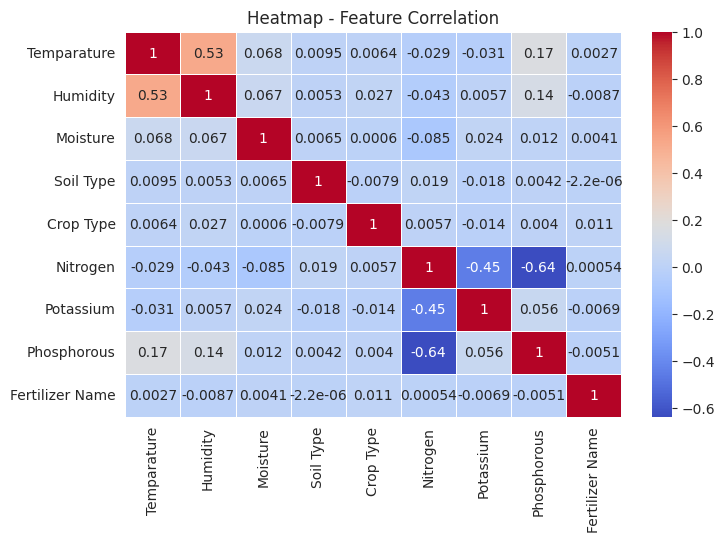

In [95]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap - Feature Correlation")
plt.show()

In [96]:
X = df.drop(columns=["Fertilizer Name", "Crop Type"])  # Features
y = df["Fertilizer Name"]  # predicting fertilizer!

In [97]:
df.head()

Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0          4          3        37          0   
1         29.0      52.0      45.0          2          8        12          0   
2         34.0      65.0      62.0          0          1         7          9   
3         32.0      62.0      34.0          3          9        22          0   
4         28.0      54.0      46.0          1          6        35          0   

   Phosphorous  Fertilizer Name  
0            0                6  
1           36                5  
2           30                1  
3           20                4  
4            0                6

In [98]:
# 📌 Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Scale Features (Optional, Good for Logistic Regression & SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
# 📌 Define Top 10 Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

🔹 Model: Logistic Regression
               precision    recall  f1-score   support

           0       0.18      0.09      0.12       241
           1       0.12      0.17      0.14       241
           2       0.15      0.19      0.17       215
           3       0.17      0.05      0.08       236
           4       0.14      0.04      0.06       219
           5       0.13      0.21      0.16       239
           6       0.10      0.16      0.12       209

    accuracy                           0.13      1600
   macro avg       0.14      0.13      0.12      1600
weighted avg       0.14      0.13      0.12      1600

🔹 Model: Random Forest
               precision    recall  f1-score   support

           0       0.17      0.16      0.17       241
           1       0.14      0.15      0.14       241
           2       0.13      0.13      0.13       215
           3       0.16      0.12      0.14       236
           4       0.14      0.15      0.14       219
           5       0.14 

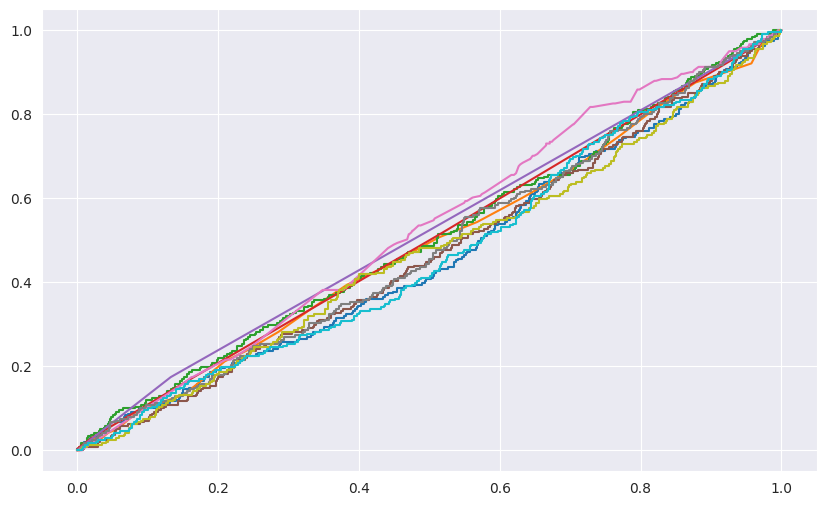

In [100]:
# 📌 Train & Evaluate Models
auc_scores = {}
plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Train Model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Classification Report
    print(f"🔹 Model: {name}\n", classification_report(y_test, y_pred))

    # AUC-ROC Score
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    auc_scores[name] = auc

    # AUC-ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

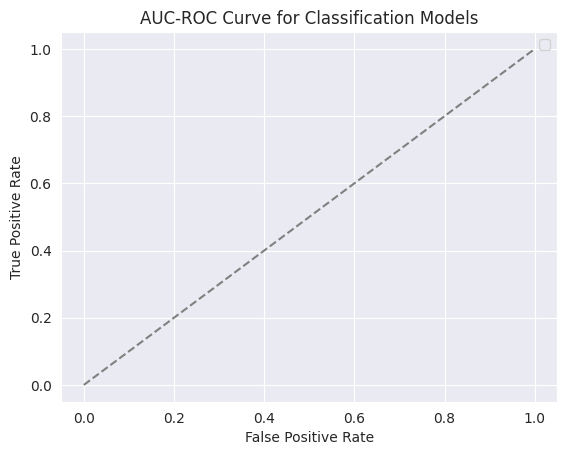

In [101]:
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Classification Models")
plt.legend()
plt.show()

In [102]:
auc_scores = dict(sorted(auc_scores.items(), key=lambda x: x[1], reverse=True))
print("\n🔹 Model Performance (Sorted by AUC Score):")
for model, score in auc_scores.items():
    print(f"{model}: AUC = {score:.3f}")


🔹 Model Performance (Sorted by AUC Score):
XGBoost: AUC = 0.506
Decision Tree: AUC = 0.506
Random Forest: AUC = 0.504
CatBoost: AUC = 0.502
K-Nearest Neighbors: AUC = 0.501
AdaBoost: AUC = 0.500
Support Vector Machine: AUC = 0.499
LightGBM: AUC = 0.495
Gradient Boosting: AUC = 0.486
Logistic Regression: AUC = 0.483


In [103]:
# 📌 Feature Importance (Using Random Forest)
feature_importance = RandomForestClassifier().fit(X_train, y_train).feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

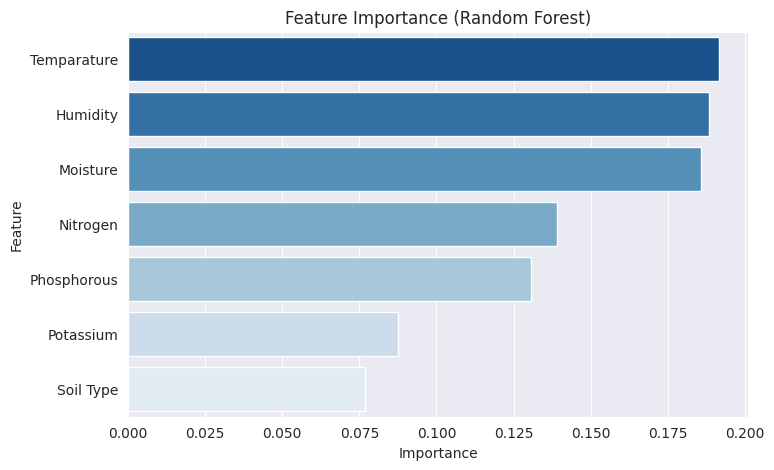

In [104]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')
plt.title("Feature Importance (Random Forest)")
plt.show()